In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

In [2]:
from tensorflow.keras import datasets, layers, optimizers, Sequential, metrics

In [3]:
(x, y), (x_val, y_val) = datasets.fashion_mnist.load_data()

In [4]:
#y = tf.one_hot(y, depth=10)

In [5]:
db=tf.data.Dataset.from_tensor_slices((x,y)).repeat()

def prepare_mnist_features_and_labels(x, y):
    x = tf.cast(x, tf.float32) / 255.0
    y = tf.cast(y, tf.int64)
    return x, y

In [6]:
#db = db.map(prepare_mnist_features_and_labels)

In [7]:
db=db.shuffle(5000).batch(100)

In [8]:
#y_val = tf.one_hot(y_val, depth=10)
ds_val = tf.data.Dataset.from_tensor_slices((x_val, y_val))
ds_val = ds_val.shuffle(10000).batch(100)

In [9]:
model = Sequential([
    layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    layers.Dense(200, activation='relu'),
    layers.Dense(200, activation='relu'),
    layers.Dense(200, activation='relu'),
    layers.Dense(10, activation='softmax')])

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
model.fit(db,epochs=10,steps_per_epoch=500,validation_data=ds_val.repeat(),
              validation_steps=2)

Train for 500 steps, validate for 2 steps
Epoch 1/10
500/500 [==============================] - 3s 5ms/step - loss: 2.2783 - accuracy: 0.7463 - val_loss: 0.8618 - val_accuracy: 0.7150
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 0.5855 - accuracy: 0.8119 - val_loss: 0.5851 - val_accuracy: 0.8300
Epoch 3/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4816 - accuracy: 0.8338 - val_loss: 0.5263 - val_accuracy: 0.8150
Epoch 4/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4395 - accuracy: 0.8459 - val_loss: 0.4513 - val_accuracy: 0.8550
Epoch 5/10
500/500 [==============================] - 2s 4ms/step - loss: 0.4100 - accuracy: 0.8532 - val_loss: 0.3872 - val_accuracy: 0.8750
Epoch 6/10
500/500 [==============================] - 2s 4ms/step - loss: 0.3923 - accuracy: 0.8601 - val_loss: 0.5172 - val_accuracy: 0.8100
Epoch 7/10
500/500 [==============================] - 2s 4ms/step - loss: 0.3745 - accuracy: 0.8654 - val_

In [12]:
b=model.predict(x_val)

In [13]:
import matplotlib.pyplot as plt

In [14]:
b.shape

(10000, 10)

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [16]:
def plot_image(i,prediction_array,true_label,img):
    prediction_array,true_label,img=prediction_array,true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label=np.argmax(prediction_array)
    if predicted_label==true_label:
        color='blue'
    else:
        color='red'
    plt.xlabel('{}{:2.0f}%({})'.format(class_names[predicted_label],
                                       100*np.max(prediction_array),
                                       class_names[true_label]),
                                        color=color)
def plot_value_array(i,prediction_array,true_label):
    prediction_array,true_label=prediction_array,true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot=plt.bar(range(10),prediction_array,color='#777777')
    plt.ylim([0,1])
    predicted_label=np.argmax(prediction_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    


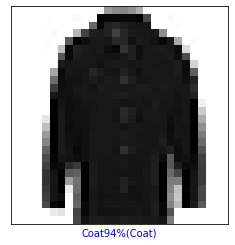

In [17]:
plot_image(14,b[14],y_val,x_val)

In [18]:
np.argmax(b[106])

5

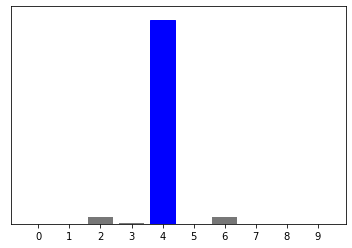

In [19]:
plot_value_array(14,b[14],y_val)

100


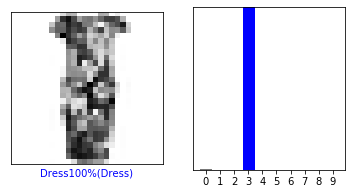

101


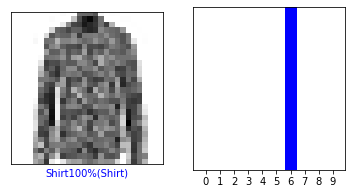

102


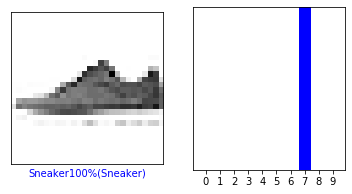

103


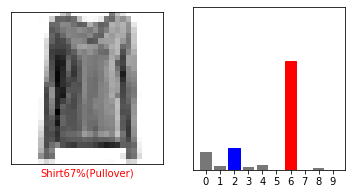

104


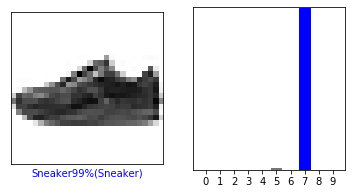

105


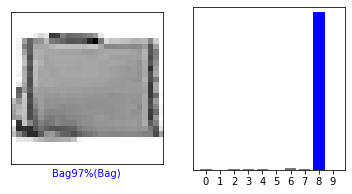

106


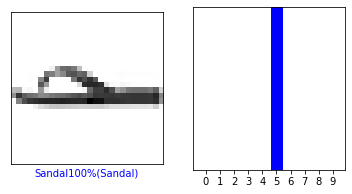

107


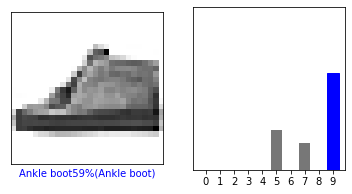

108


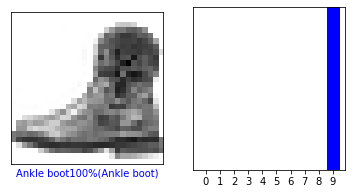

109


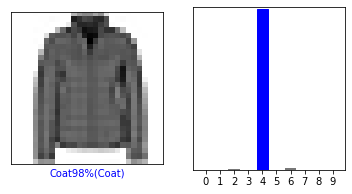

110


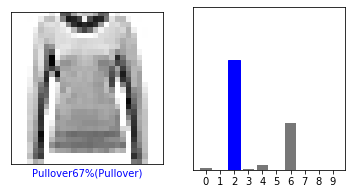

111


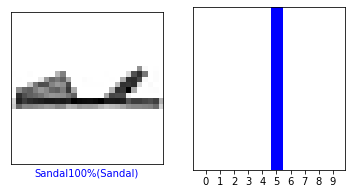

112


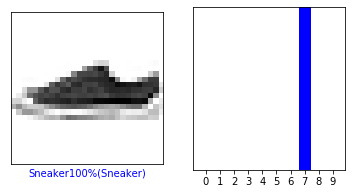

113


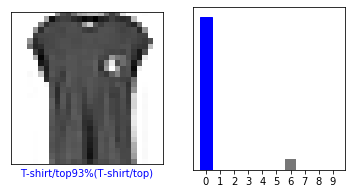

114


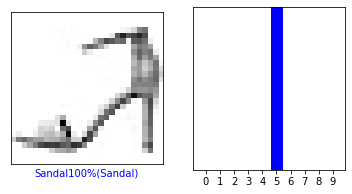

In [20]:
for i in range(100,115):
    print(i)
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i,b[i],y_val,x_val)
    plt.subplot(1,2,2)
    plot_value_array(i,b[i],y_val)
    plt.show()

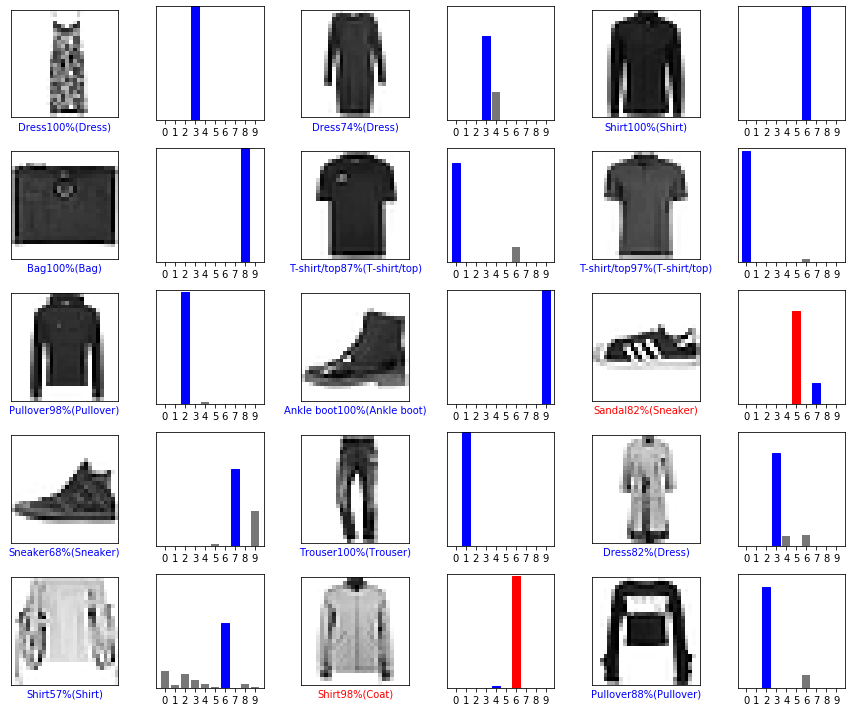

In [21]:
num_row=5
num_col=3
num_image=num_row*num_col+300
plt.figure(figsize=(2*2*num_col,2*num_row))
for i in range(300,num_image):
    plt.subplot(num_row,num_col*2,(i-300)*2+1)
    plot_image(i,b[i],y_val,x_val)
    plt.subplot(num_row,num_col*2,(i-300)*2+2)
    plot_value_array(i,b[i],y_val)
plt.tight_layout()
plt.show()
    

In [22]:
c=np.argmax(b,axis=1)

In [23]:
def find():
    d=[]
    for i in range(10000):
        if c[i]!=y_val[i]:
            d.append(i)
    return d
    

In [24]:
los,acc=model.evaluate(x_val,y_val)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [25]:
d=find()

In [26]:
1-len(d)/len(y_val)

0.8418

In [27]:
acc

0.8418

In [28]:
np.argmax(model.predict(np.expand_dims(x_val[14],0))),y_val[14]

(4, 4)

In [29]:
class_names[2],class_names[4]

('Pullover', 'Coat')